In [ ]:
from google.colab import files
import astropy.io.ascii
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Import data
uploaded = files.upload()

Saving Tonry_2003.vot to Tonry_2003.vot


In [ ]:
# Process data
dat = astropy.io.ascii.read("Tonry_2003.vot")

distance = 10**dat['col8'] / 72 * u.mpc
distance_error = (10**(dat["col8"]+dat["col9"]) - 10**dat["col8"]) / 72.0 * u.mpc
velocity = 10**dat["col7"] * u.km / u.s

/usr/local/lib/python3.10/dist-packages/astropy/io/ascii/html.py:91: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  soup = BeautifulSoup("\n".join(lines))


Text(0, 0.5, 'Velocity [km/s]')

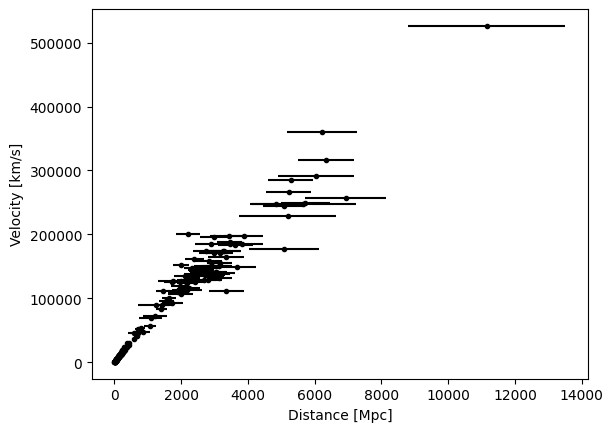

In [ ]:
# Plot data

plt.errorbar(distance, velocity, xerr=distance_error, marker=".", color="black", linestyle="none")
plt.xlabel("Distance [Mpc]")
plt.ylabel("Velocity [km/s]")

In [ ]:
# Fit linear model
model = np.poly1d(np.polyfit(distance.value, velocity.value, 1))

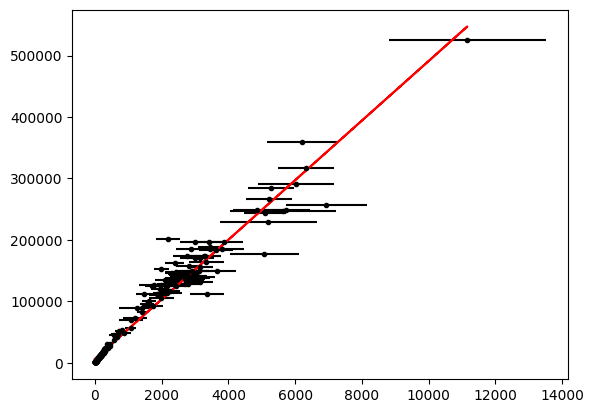

In [ ]:
# Plot fitted model together with the data

plt.errorbar(distance, velocity, xerr=distance_error, marker=".", color="black", linestyle="none")
plt.plot(distance, model(distance.value), color="red")

In [ ]:
# Measurement of Hubble constant

H_0_est = model.coefficients[0] * u.km / u.s / u.Mpc
H_0_est

<Quantity 48.4659782 km / (Mpc s)>

In [ ]:
age_universe_est = (1 / H_0_est).to(u.Gyr)
age_universe_est

<Quantity 20.1748166 Gyr>